<a href="https://colab.research.google.com/github/orizay/free-fonts/blob/master/Sciktit_Learn_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Whatis scikit-learn?
- Simple and efficient tool for data mining and data analysis
- Built on Numpy,SciPy,and matplotlib
- Open source,commercially usable - BSD license

# What we can achieve using scitit-learn
- Classification
  - ldentifying which category an object belongs to
  - Application : Spam detection


- Regression 
  - Predicting an attribute associated with an object
  - Application : Stock prices prediction


- Dimensionality reduction
  - Reducing the number of random variables to consider
  - Application : To increase model efficiency


- Pre - processing
  - Feature extraction and normalization
  - Application : Transforming input data such as text for use with machine learning algorithms

In [2]:
# Importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
# from skearn.linear_model import SGDLassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# Loading dataset
wine = pd.read_csv('/content/drive/My Drive/MyData/winequality-red .csv',sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# Preprocessing Data 
bins = (2,6.5,8)
group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'],bins= bins,labels= group_names)
# wine['quality'].unique()

In [8]:
wine['quality'].dtype

CategoricalDtype(categories=['bad', 'good'], ordered=True)

In [9]:
label_quality = LabelEncoder()

In [10]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [11]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [12]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

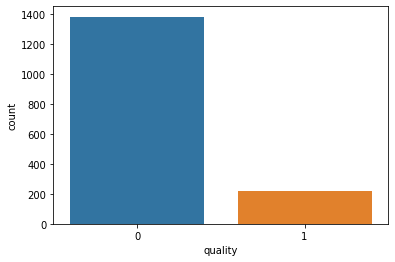

In [13]:
sns.countplot(wine['quality'])

In [14]:
# Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality',axis= 1 )
y = wine['quality']

In [15]:
# Train and Test splitting of data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state= 42)

In [16]:
# Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [17]:
X_train[:10]

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, -0.52637831,  0.59927236,
        -0.95796016, -0.99174203,  0.76865471, -0.07566946,  0.51551749,
        -0.58738978],
       [ 0.27635078,  0.86181102, -0.06383064, -0.66572897, -0.00908493,
         0.01202048, -0.71842739,  0.08948842,  0.05423824, -1.08873281,
        -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095,  2.39998549, -0.31326357,
        -0.47296984,  0.2229897 ,  1.1998714 ,  0.37900751, -0.9741435 ,
        -0.49235828],
       [-0.07176411, -0.78434707,  1.11341454, -0.17800167,  0.21397941,
         3.01896045,  2.62208486,  0.60694845,  0.44396136,  1.89058918,
        -0.587

# **Random Forest Classifier**

In [18]:
rfc = RandomForestClassifier(n_estimators= 200)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

In [19]:
pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [20]:
# Let's see how our model performed
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       273
           1       0.69      0.43      0.53        47

    accuracy                           0.89       320
   macro avg       0.80      0.70      0.73       320
weighted avg       0.88      0.89      0.88       320

[[264   9]
 [ 27  20]]


# **SVM Classifier**

In [21]:
clf = svm.SVC()
clf.fit(X_train,y_train)
pred_clf = clf.predict(X_test)

In [22]:
# Let's see how our model performed
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


# **Neural Network**

In [23]:
mlpc = MLPClassifier(hidden_layer_sizes= (11,11,11),max_iter= 500)
mlpc.fit(X_train,y_train)
pred_mlpc = mlpc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [24]:
# Let's see how our model performed
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       273
           1       0.56      0.40      0.47        47

    accuracy                           0.87       320
   macro avg       0.73      0.67      0.70       320
weighted avg       0.85      0.87      0.86       320

[[258  15]
 [ 28  19]]


In [25]:
from sklearn.metrics import accuracy_score

In [27]:
cm = accuracy_score(y_test,pred_rfc)
cm

0.8875

In [28]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [30]:
Xnew = [[7.3,0.65,0.00,1.2,0.065,15.0,21.0,	0.9946,3.39,0.47,10.0]]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew

array([0])